In [1]:
# Starter med å importere to viktig libraries for LSTM

import tensorflow as tf
import pandas as pd

# Leser csv filen
#df = pd.read_csv('NO0010791353_10.02.2025_16.23.44.csv', delimiter=';', names=['date', 'adjusted_price'])
#df = df.drop(0) # fjern første rad som hadde kolonnenavnene
#df.head()

In [2]:
# Leser csv filen
df = pd.read_csv('/content/project/2074251_26.02.2025_08.54.35.csv', delimiter=';', names=['date', 'last'])
df = df.drop(0) # fjern første rad som hadde kolonnenavnene
df.head()

,date,last
1,2020-01-03,94.7199919
2,2020-01-06,92.11671789
3,2020-01-07,92.99598354
4,2020-01-08,92.95578234
5,2020-01-09,93.06776594


In [3]:
df.shape

(230, 2)

In [7]:
df.tail()

,date,last
226,2020-11-23,72.2067907
227,2020-11-24,73.32835642
228,2020-11-25,72.44859514
229,2020-11-26,72.54434125
230,2020-11-27,73.16937386


In [8]:
import matplotlib.pyplot as plt
import datetime

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['last'] = df['last'].astype(float)

In [9]:
df = df.sort_values(by='date')

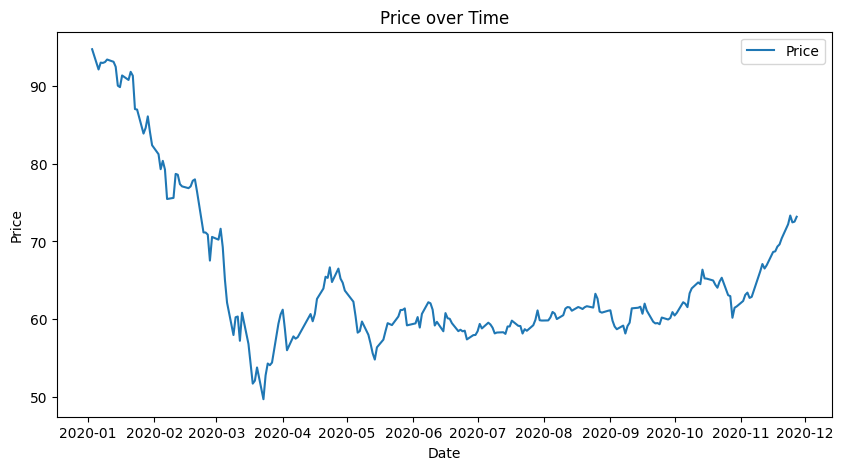

In [10]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['last'], label='Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')
plt.legend()
plt.show()

In [ ]:
### Funksjon som endrer et 'Object' med splitten '-' til datetime-variabel.
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2]) # Splitter på hver int (heltall)
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-03-19')
type(datetime_object)

datetime.datetime

In [ ]:
import numpy as np

### Denne koden konverterer en time-series dataframe (df) av aksje-lukkepriser til en ny ###
### df hvor hver rad inneholder "et vindu" av tidligere verdier (n = 3), altså dag i-1, i-2 ###
### og i-3, i tillegg inneholder det target-value (dag i). Kilde: Gregg Hogg (YouTube) ###



def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while not last_time:
    df_subset = dataframe.loc[dataframe.index <= target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['adjusted_price'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2018-02-01',
                                '2025-02-02',
                                n=3)
windowed_df

MemoryError: Unable to allocate 13.9 KiB for an array with shape (1782, 1) and data type float64

In [ ]:
df

,adjusted_price
date,
2018-01-29,20.803615
2018-01-30,20.407356
2018-01-31,20.605485
2018-02-01,20.605485
2018-02-02,20.605485
...,...
2025-01-31,18.400000
2025-02-03,18.170000
2025-02-04,18.850000
